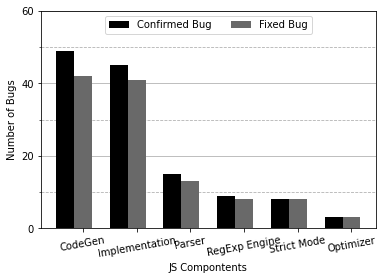

In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator



def extractMetrics(type, result):
    # 对Bug统计情况画图
    CodeGen_number = {"Confirmed Bug": result['CodeGen'][1], "Fixed Bug": result['CodeGen'][0]}
    CodeGen = CodeGen_number[type]
    Implementation_number = {"Confirmed Bug": result['Implementation'][1], "Fixed Bug": result['Implementation'][0]}
    Implementation = Implementation_number[type]
    Parser_number = {"Confirmed Bug": result['Parser'][1], "Fixed Bug": result['Parser'][0]}
    Parser = Parser_number[type]
    RegExp_Engine_number = {"Confirmed Bug": result['RegExp Engine'][1], "Fixed Bug": result['RegExp Engine'][0]}
    RegExp_Engine = RegExp_Engine_number[type]
    Strict_Mode_number = {"Confirmed Bug": result['Strict Mode'][1], "Fixed Bug": result['Strict Mode'][0]}
    Strict_Mode = Strict_Mode_number[type]
    Optimizer_number = {"Confirmed Bug": result['Optimizer'][1], "Fixed Bug": result['Optimizer'][0]}
    Optimizer = Optimizer_number[type]

    return [CodeGen, Implementation, Parser, RegExp_Engine, Strict_Mode, Optimizer]

def drawBars(result):
    arguments = ["CodeGen", "Implementation", "Parser", "RegExp Engine", "Strict Mode", "Optimizer"]
    Confirmed = extractMetrics("Confirmed Bug", result)
    Fixed = extractMetrics("Fixed Bug", result)
    types = [Confirmed, Fixed]
    types_names = ["Confirmed Bug", "Fixed Bug"]
    fc = ['k', 'dimgray', 'grey', 'darkgray', 'lightgray', 'gainsboro']

    x = list(range(len(Confirmed)))
    total_width, n = 2, 6
    width = total_width / n

    # 设置主次刻度间隔
    ymajorLocator = MultipleLocator(20)
    yminorLocator = MultipleLocator(10)

    # 设置y轴刻度值
    plt.yticks([0, 20, 40, 60])
    plt.ylim(0, 60)
    # 设置主次刻度线
    plt.grid(which="major", axis="y", linestyle="-")
    plt.grid(which="minor", axis="y", linestyle="--")
    # 显示主次刻度
    plt.gca().yaxis.set_major_locator(ymajorLocator)
    plt.gca().yaxis.set_minor_locator(yminorLocator)

    plt.xticks(rotation=10)
    plt.xlabel("JS Compontents")
    plt.ylabel("Number of Bugs")
    # 显示柱状图
    for i in range(len(types)):
        if i == len(types) - 3:
            # zorder越大，表示柱子越靠后，不会被虚线覆盖
            plt.bar(x, types[i], width=width, label=types_names[i], tick_label=arguments, fc=fc[i], zorder=2)
        else:
            plt.bar(x, types[i], width=width, label=types_names[i], tick_label=arguments, fc=fc[i], zorder=2)
        for j in range(len(x)):
            x[j] = x[j] + width

    plt.legend(loc='upper center', fontsize=10, ncol=3)
    plt.show()
    plt.style.use('ggplot')

if __name__ == "__main__":
    result = {'CodeGen': [42, 49], 'Implementation': [41, 45], 'Parser': [13, 15], 'RegExp Engine': [8, 9], 'Strict Mode': [8, 8], 'Optimizer': [3, 3]}
    drawBars(result)